In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
backSub = cv2.createBackgroundSubtractorMOG2(300, 400, 2)
#backSub = cv2.createBackgroundSubtractorKNN(detectShadows=True)
    
capture = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/HUMAN DET/view-1/0 - 2019-12-20 11-00-00-365.mov")



#capture = cv2.VideoCapture("C:/Users/shrin/Downloads/WhatsApp Video 2020-01-07 at 1.09.33 PM.mp4")

capture.set(cv2.CAP_PROP_POS_FRAMES,3000)

template = cv2.imread('template2.jpg',0)


if not capture.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    blurFrame = cv2.GaussianBlur(frame,(9,9),0)
    
    fgMask = backSub.apply(blurFrame)
    
    cv2.rectangle(fgMask, (410, 80), (573,110), (0), -1)
    cv2.rectangle(fgMask, (20, 300), (40,345), (0), -1)  # time = [410,80,573,110]  blinkRed = [20,300,40,345]
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    fgMask = dilation = cv2.dilate(fgMask,kernel,iterations = 5)
    
    '''img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)'''
    
    
    # thrsh
    _,undistortedThreh = cv2.threshold(fgMask,230,250,cv2.THRESH_BINARY) 
    blank = np.zeros((frame.shape),np.uint8)
    #print(blank.shape,"shape<------------------------------")
    # cnts
    _ , contours, hierarchy =   cv2.findContours(undistortedThreh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    
    if len(cnts)< 15:
        for c in cnts:
            #print(cv2.contourArea(c))
            if cv2.contourArea(c) < 3000 and cv2.contourArea(c) > 35:
                perimeter = cv2.arcLength(c,True)
                epsilon = 0.0001*cv2.arcLength(c,True)
                approx = cv2.approxPolyDP(c,epsilon,True)
                x,y,w,h = cv2.boundingRect(approx)
                if x > 165 and x < 691 and y > 190 and y < 340:# (165, 190, 691, 423)
                    #cv2.rectangle(frame, (250,45), (350,85), (255,255,255), -1)
                    cv2.putText(frame, "....Man IN Danger Zone....", (175, 45),
               cv2.FONT_HERSHEY_SIMPLEX, 1 , (0,0,255),2)
                    
                #cv2.rectangle(frame, (x, y), (x+w,y+h), (0,255,25), 5)
                cntDraw = cv2.drawContours(blank,[approx],-1,255,1)
                
                #imgGray = cv2.cvtColor(frame[y-15:y+h+10, x-15:x+w+10],cv2.COLOR_BGR2GRAY)
                #plt.imshow(blank[y-15:y+h+10, x-15:x+w+10])
                #cv2.imshow('Frame', cntDraw)
                
                imgGray = cv2.cvtColor(cntDraw[y:y+h, x:x+w],cv2.COLOR_BGR2GRAY)
                circles = cv2.HoughCircles(imgGray, cv2.HOUGH_GRADIENT, 1, 300)

                # ensure at least some circles were found
                if circles is not None:
                    print("xbcjkbjkxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
                    # convert the (x, y) coordinates and radius of the circles to integers
                    circles = np.round(circles[0, :]).astype("int")

                    # loop over the (x, y) coordinates and radius of the circles
                    for (x, y, r) in circles:
                        # draw the circle in the output image, then draw a rectangle
                        # corresponding to the center of the circle
                        cv2.circle(frame, (x, y), r, (0, 255, 0), -1)
                        cv2.rectangle(frame, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
                        
#                else:
#                    print("noooooooo circle")

                
                
    '''elif len(cnts) == 0 or len(cnts) == None or len(cnts) >15:
        cv2.putText(frame, "....temp matching....", (175, frame.shape[0] - 45),
               cv2.FONT_HERSHEY_SIMPLEX, 1 , (0,0,255),2)
        print("_______________________________")
        
        imgGray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        res = cv2.matchTemplate(imgGray,template,cv2.TM_CCOEFF_NORMED) #cv2.TM_CCOEFF_NORMED)cv2.TM_CCOEFF
        threshold = 0.59
        loc = np.where( res >= threshold)
        
        
        # h circles
        
        circles = cv2.HoughCircles(imgGray, cv2.HOUGH_GRADIENT, 1, 500)

        # ensure at least some circles were found
        if circles is not None:
            # convert the (x, y) coordinates and radius of the circles to integers
            circles = np.round(circles[0, :]).astype("int")

            # loop over the (x, y) coordinates and radius of the circles
            for (x, y, r) in circles:
                # draw the circle in the output image, then draw a rectangle
                # corresponding to the center of the circle
                cv2.circle(frame, (x, y), r, (0, 255, 0), 4)
                cv2.rectangle(frame, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        if len(loc) == 2:
            for pt in zip(*loc[::-1]):
                print(pt)
                cv2.rectangle(imgGray, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
                template = imgGray[pt[1]:pt[1]+h, pt[0]:pt[0]+w]
                w, h = template.shape[::-1]
                break
'''        ''' else:
            template = cv2.imread('template1.jpg',0)
            w, h = template.shape[::-1]'''


        
            
            
        
    #print("Next----------------------------------------------------------------------------------------------")
    
    #draw cnt
    
    
    
        
    
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)
    #cv2.imshow('thresh', undistortedThreh)
    cv2.imshow('Cnt Draw', cntDraw)
    time.sleep(.1)
    
    '''cv2.imshow('g', g)
    cv2.imshow('b', b)
    cv2.imshow('h', h)
    cv2.imshow('s', s)
    cv2.imshow('v', v)'''
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#%matplotlib notebook

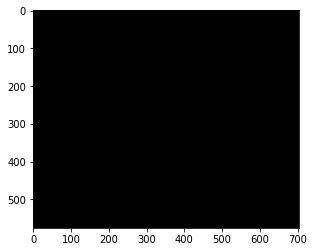

In [4]:
plt.imshow(blank)

ValueError: zero-size array to reduction operation minimum which has no identity

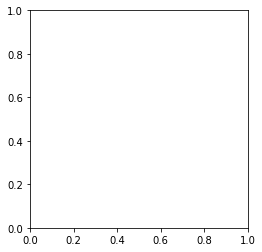

In [5]:
plt.imshow(blank[y-15:y+h+10, x-15:x+w+10])

In [ ]:
220,410,246,437

In [ ]:

template = frame[410:437,220:246]
cv2.imwrite("template2.jpg",template)

In [ ]:
#breakpoint()

In [15]:
import cv2
import numpy as np
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/HUMAN DET/view-1/0 - 2019-12-20 11-00-00-365.mov")

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback( prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2',rgb)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        #cv2.imwrite('opticalfb.png',frame2)
        #cv2.imwrite('opticalhsv.png',rgb)
        print("sss")
    prvs = next

cap.release()
cv2.destroyAllWindows()